In [1]:
import numpy as np
import pickle
import tensorflow as tf
from keras.models import Sequential
from keras.layers import BatchNormalization, Conv2D, MaxPooling2D, Flatten, Dropout, Dense
from keras import backend as K
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator, img_to_array


In [2]:
import os

def total_files(folder_path):
    num_files = len([f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))])
    return num_files

train_healthy = r"C:\Users\Ownerqp\OneDrive\Sohan\OneDrive - MESCOE\Desktop\BE\8sem\DL\Assignment03\Train\Train\Healthy"
train_powdery = r"C:\Users\Ownerqp\OneDrive\Sohan\OneDrive - MESCOE\Desktop\BE\8sem\DL\Assignment03\Train\Train\Powdery"
train_rust =r"C:\Users\Ownerqp\OneDrive\Sohan\OneDrive - MESCOE\Desktop\BE\8sem\DL\Assignment03\Train\Train\Rust"

test_healthy =r"C:\Users\Ownerqp\OneDrive\Sohan\OneDrive - MESCOE\Desktop\BE\8sem\DL\Assignment03\Test\Test\Healthy"
test_powdery =r"C:\Users\Ownerqp\OneDrive\Sohan\OneDrive - MESCOE\Desktop\BE\8sem\DL\Assignment03\Test\Test\Powdery"
test_rust =r"C:\Users\Ownerqp\OneDrive\Sohan\OneDrive - MESCOE\Desktop\BE\8sem\DL\Assignment03\Test\Test\Rust"

valid_healthy = r"C:\Users\Ownerqp\OneDrive\Sohan\OneDrive - MESCOE\Desktop\BE\8sem\DL\Assignment03\Validation\Validation\Healthy"
valid_powdery =r"C:\Users\Ownerqp\OneDrive\Sohan\OneDrive - MESCOE\Desktop\BE\8sem\DL\Assignment03\Validation\Validation\Powdery"
valid_rust =r"C:\Users\Ownerqp\OneDrive\Sohan\OneDrive - MESCOE\Desktop\BE\8sem\DL\Assignment03\Validation\Validation\Rust"

In [3]:
print("Number of healthy leaf images in training set: ", total_files(train_healthy))
print("Number of powder leaf images in training set: ", total_files(train_powdery))
print("Number of rusty leaf images in training set: ", total_files(train_rust))
 
print("========================================================")

print("Number of healthy leaf images in test set: ", total_files(test_healthy))
print("Number of powder leaf images in test set: ", total_files(test_powdery))
print("Number of rusty leaf images in test set: ", total_files(test_rust))

print("========================================================")

print("Number of healthy leaf images in validation set: ", total_files(valid_healthy))
print("Number of powder leaf images in validation set: ", total_files(valid_powdery))
print("Number of rusty leaf images in validation set: ", total_files(valid_rust))

Number of healthy leaf images in training set:  458
Number of powder leaf images in training set:  430
Number of rusty leaf images in training set:  434
Number of healthy leaf images in test set:  50
Number of powder leaf images in test set:  50
Number of rusty leaf images in test set:  50
Number of healthy leaf images in validation set:  20
Number of powder leaf images in validation set:  20
Number of rusty leaf images in validation set:  20


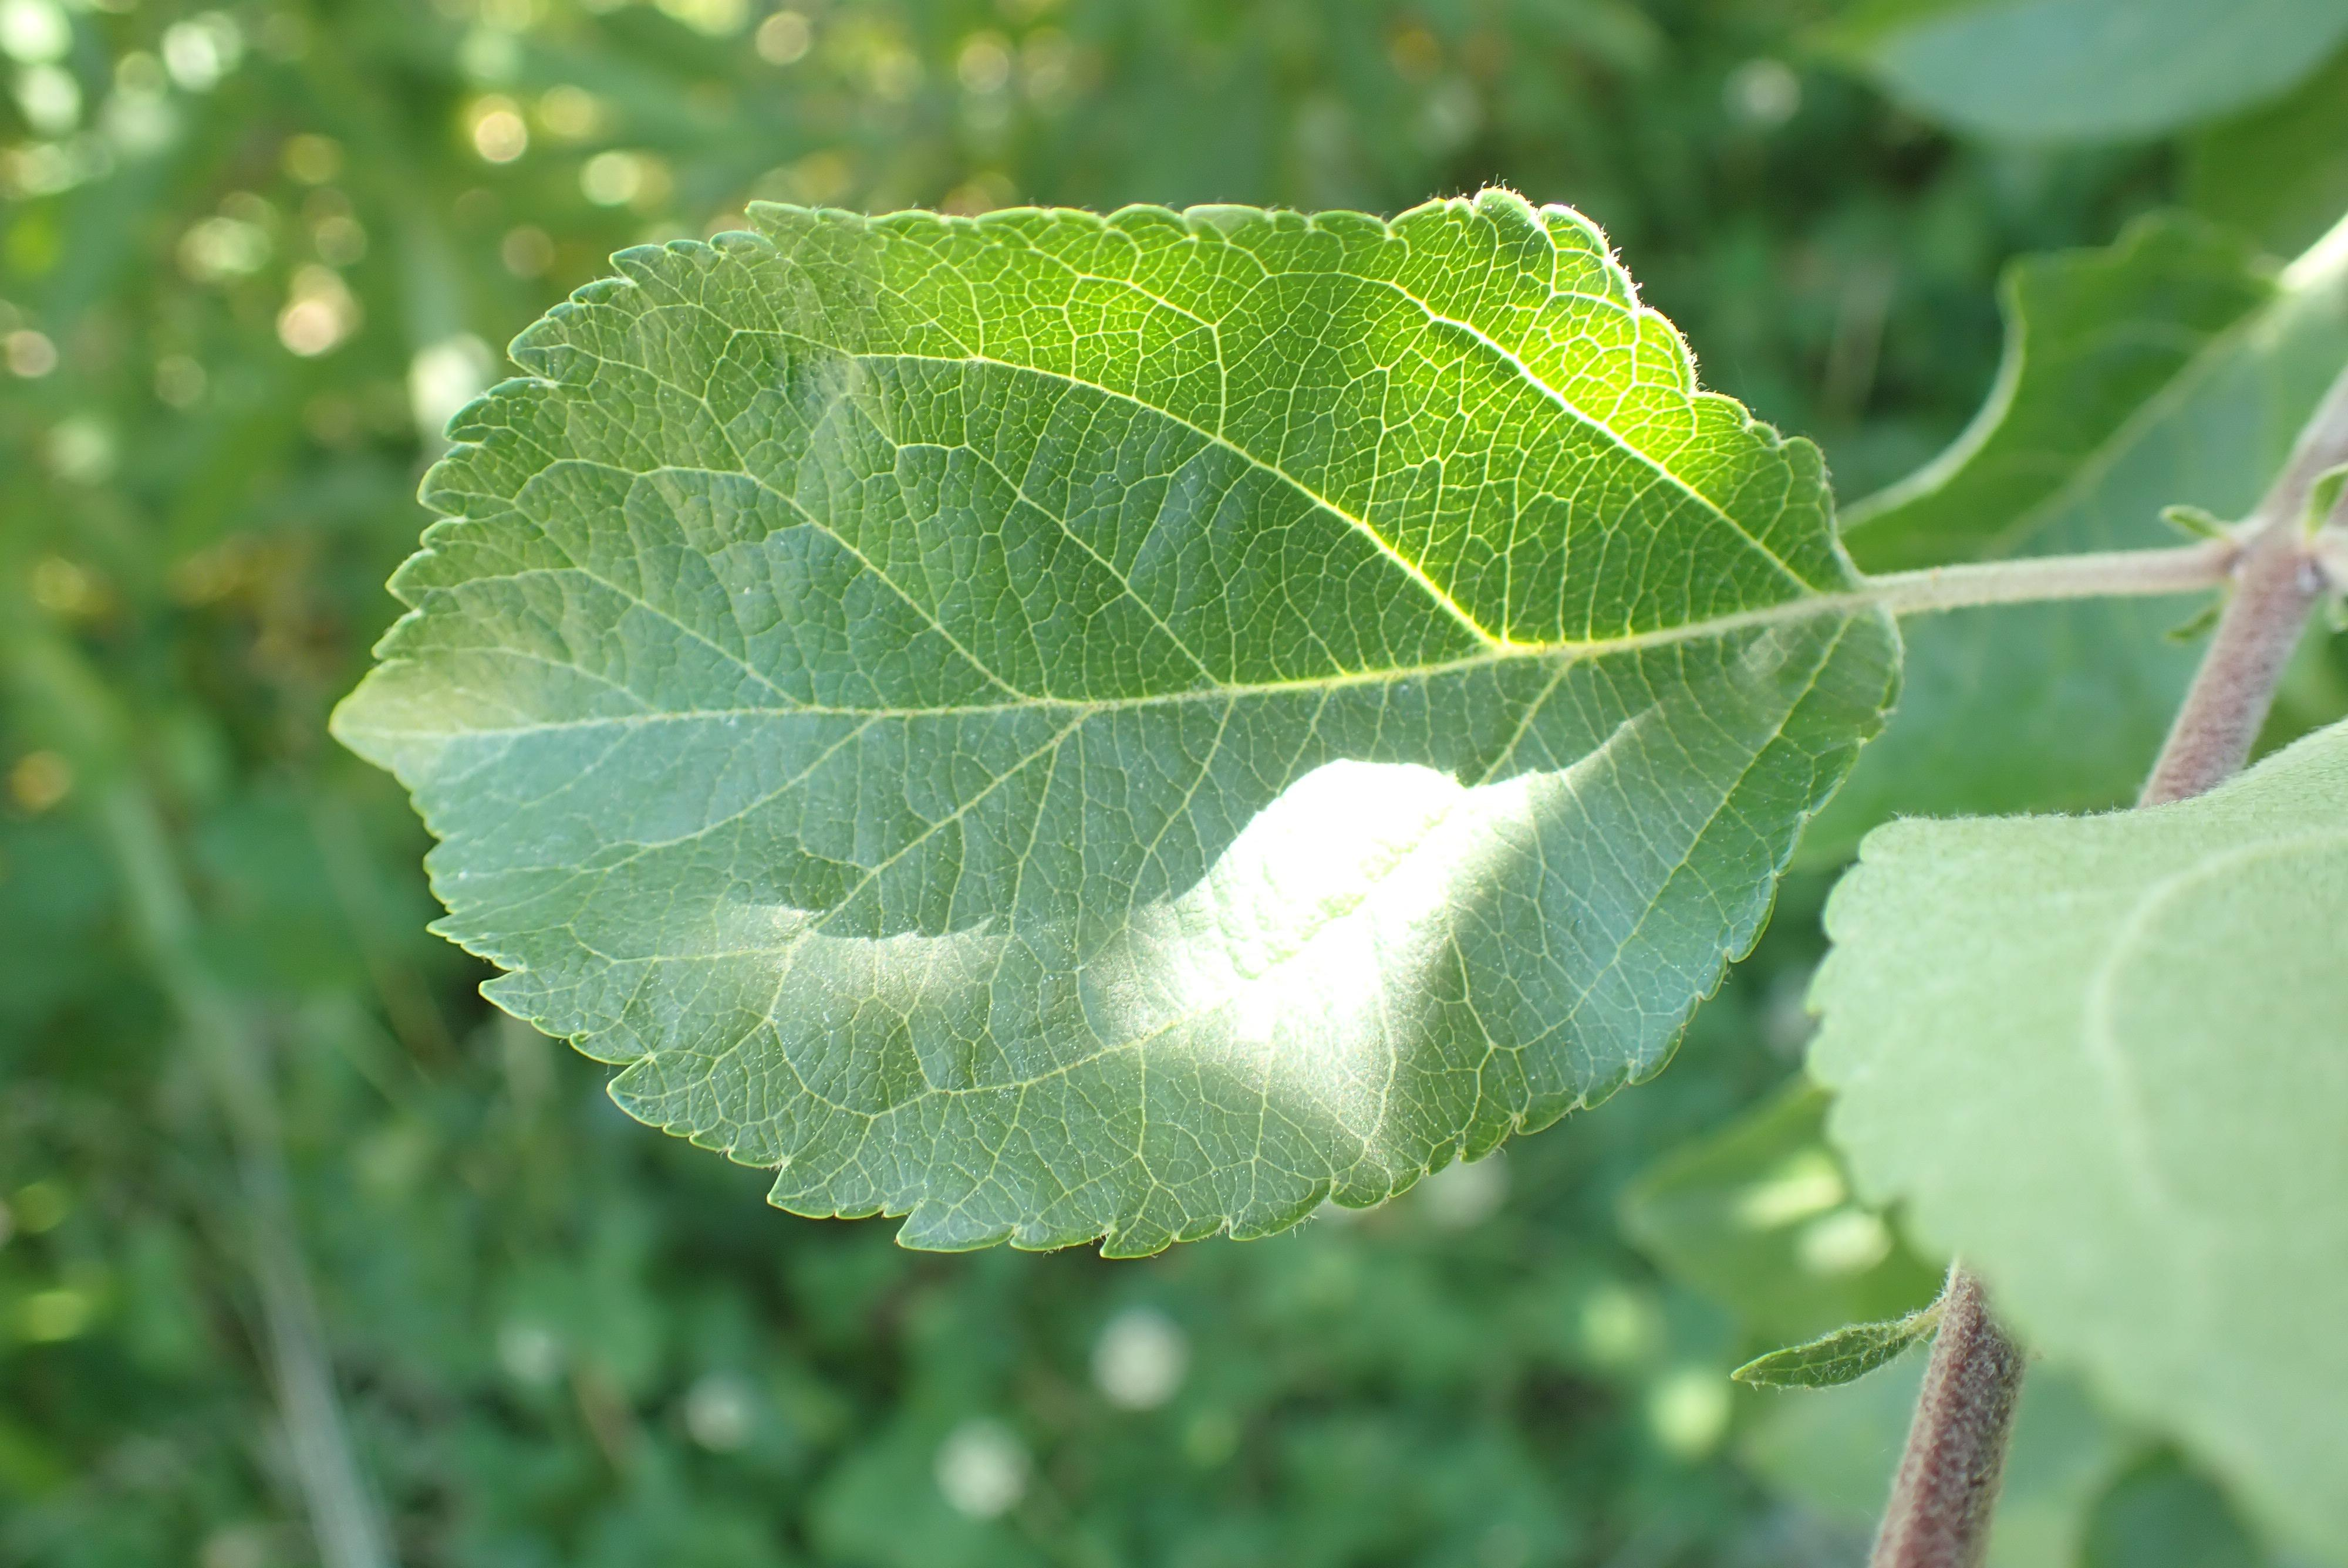

In [4]:
from PIL import Image
import IPython.display as display

image_path =r'C:\Users\Ownerqp\OneDrive\Sohan\OneDrive - MESCOE\Desktop\BE\8sem\DL\Assignment03\Train\Train\Healthy/8bd27e8d6124a5b3.jpg'

with open(image_path, 'rb') as f:
    display.display(display.Image(data=f.read(), width=500))

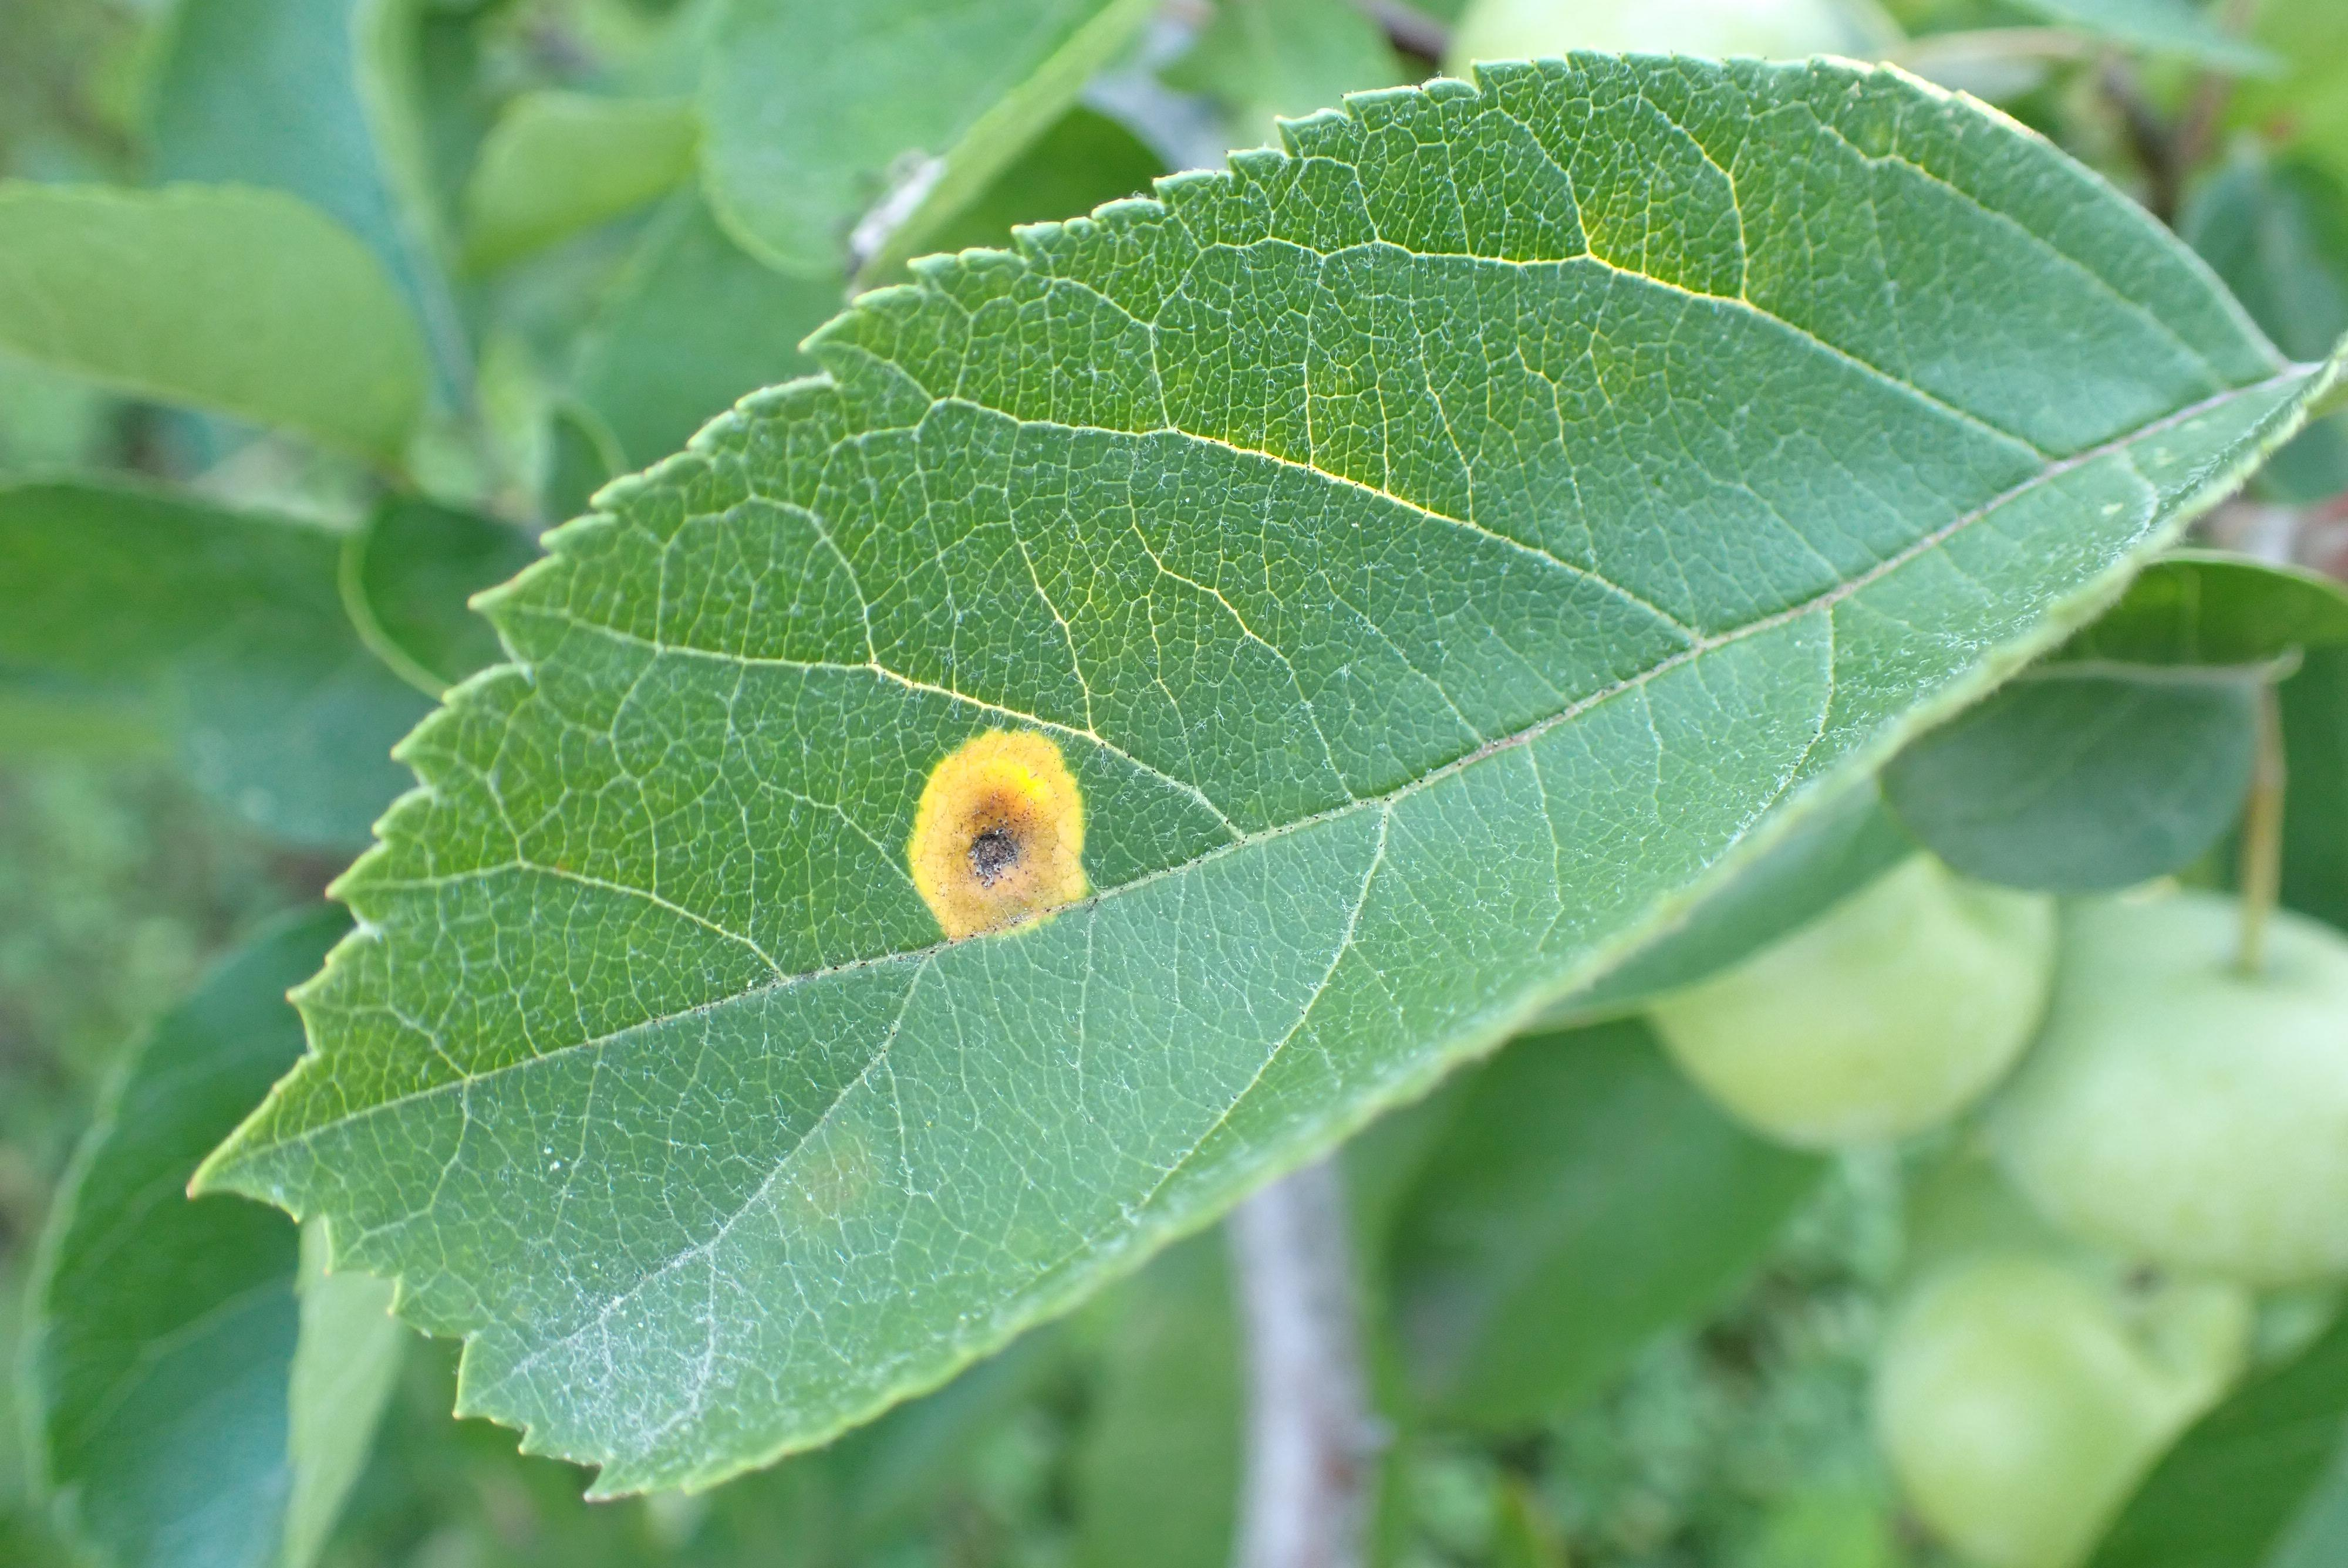

In [5]:
from PIL import Image
import IPython.display as display

image_path = r"C:\Users\Ownerqp\OneDrive\Sohan\OneDrive - MESCOE\Desktop\BE\8sem\DL\Assignment03\Test\Test\Rust/85f6618e5784b9a3.jpg"

with open(image_path, 'rb') as f:
    display.display(display.Image(data=f.read(), width=500))

In [6]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(r'C:\Users\Ownerqp\OneDrive\Sohan\OneDrive - MESCOE\Desktop\BE\8sem\DL\Assignment03\Train\Train',
                                                    target_size=(225, 225),
                                                    batch_size=32,
                                                    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(r'C:\Users\Ownerqp\OneDrive\Sohan\OneDrive - MESCOE\Desktop\BE\8sem\DL\Assignment03\Validation\Validation',
                                                        target_size=(225, 225),
                                                        batch_size=32,
                                                        class_mode='categorical')

Found 1322 images belonging to 3 classes.
Found 60 images belonging to 3 classes.


In [7]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense


model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(225, 225, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(3, activation='softmax'))

In [8]:
import time
start_time=time.time()
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_generator,
                    batch_size=16,
                    epochs=5,
                    validation_data=validation_generator,
                    validation_batch_size=16
                    )
train_time = time.time()-start_time
print(f"Training time-{train_time}seconds")


Epoch 1/5


42/42 [==============================] - 309s 7s/step - loss: 1.5693 - accuracy: 0.5098 - val_loss: 0.7268 - val_accuracy: 0.7167
Epoch 2/5
42/42 [==============================] - 272s 6s/step - loss: 0.5689 - accuracy: 0.7564 - val_loss: 0.6340 - val_accuracy: 0.7833
Epoch 3/5
42/42 [==============================] - 271s 6s/step - loss: 0.3999 - accuracy: 0.8555 - val_loss: 0.4550 - val_accuracy: 0.8333
Epoch 4/5
42/42 [==============================] - 278s 7s/step - loss: 0.3777 - accuracy: 0.8608 - val_loss: 0.5821 - val_accuracy: 0.7333
Epoch 5/5
42/42 [==============================] - 275s 7s/step - loss: 0.3476 - accuracy: 0.8661 - val_loss: 0.4429 - val_accuracy: 0.8500
Training time-1412.343938112259seconds


In [16]:
model.save("plant_disease.h5")

C:\Users\Ownerqp\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
model

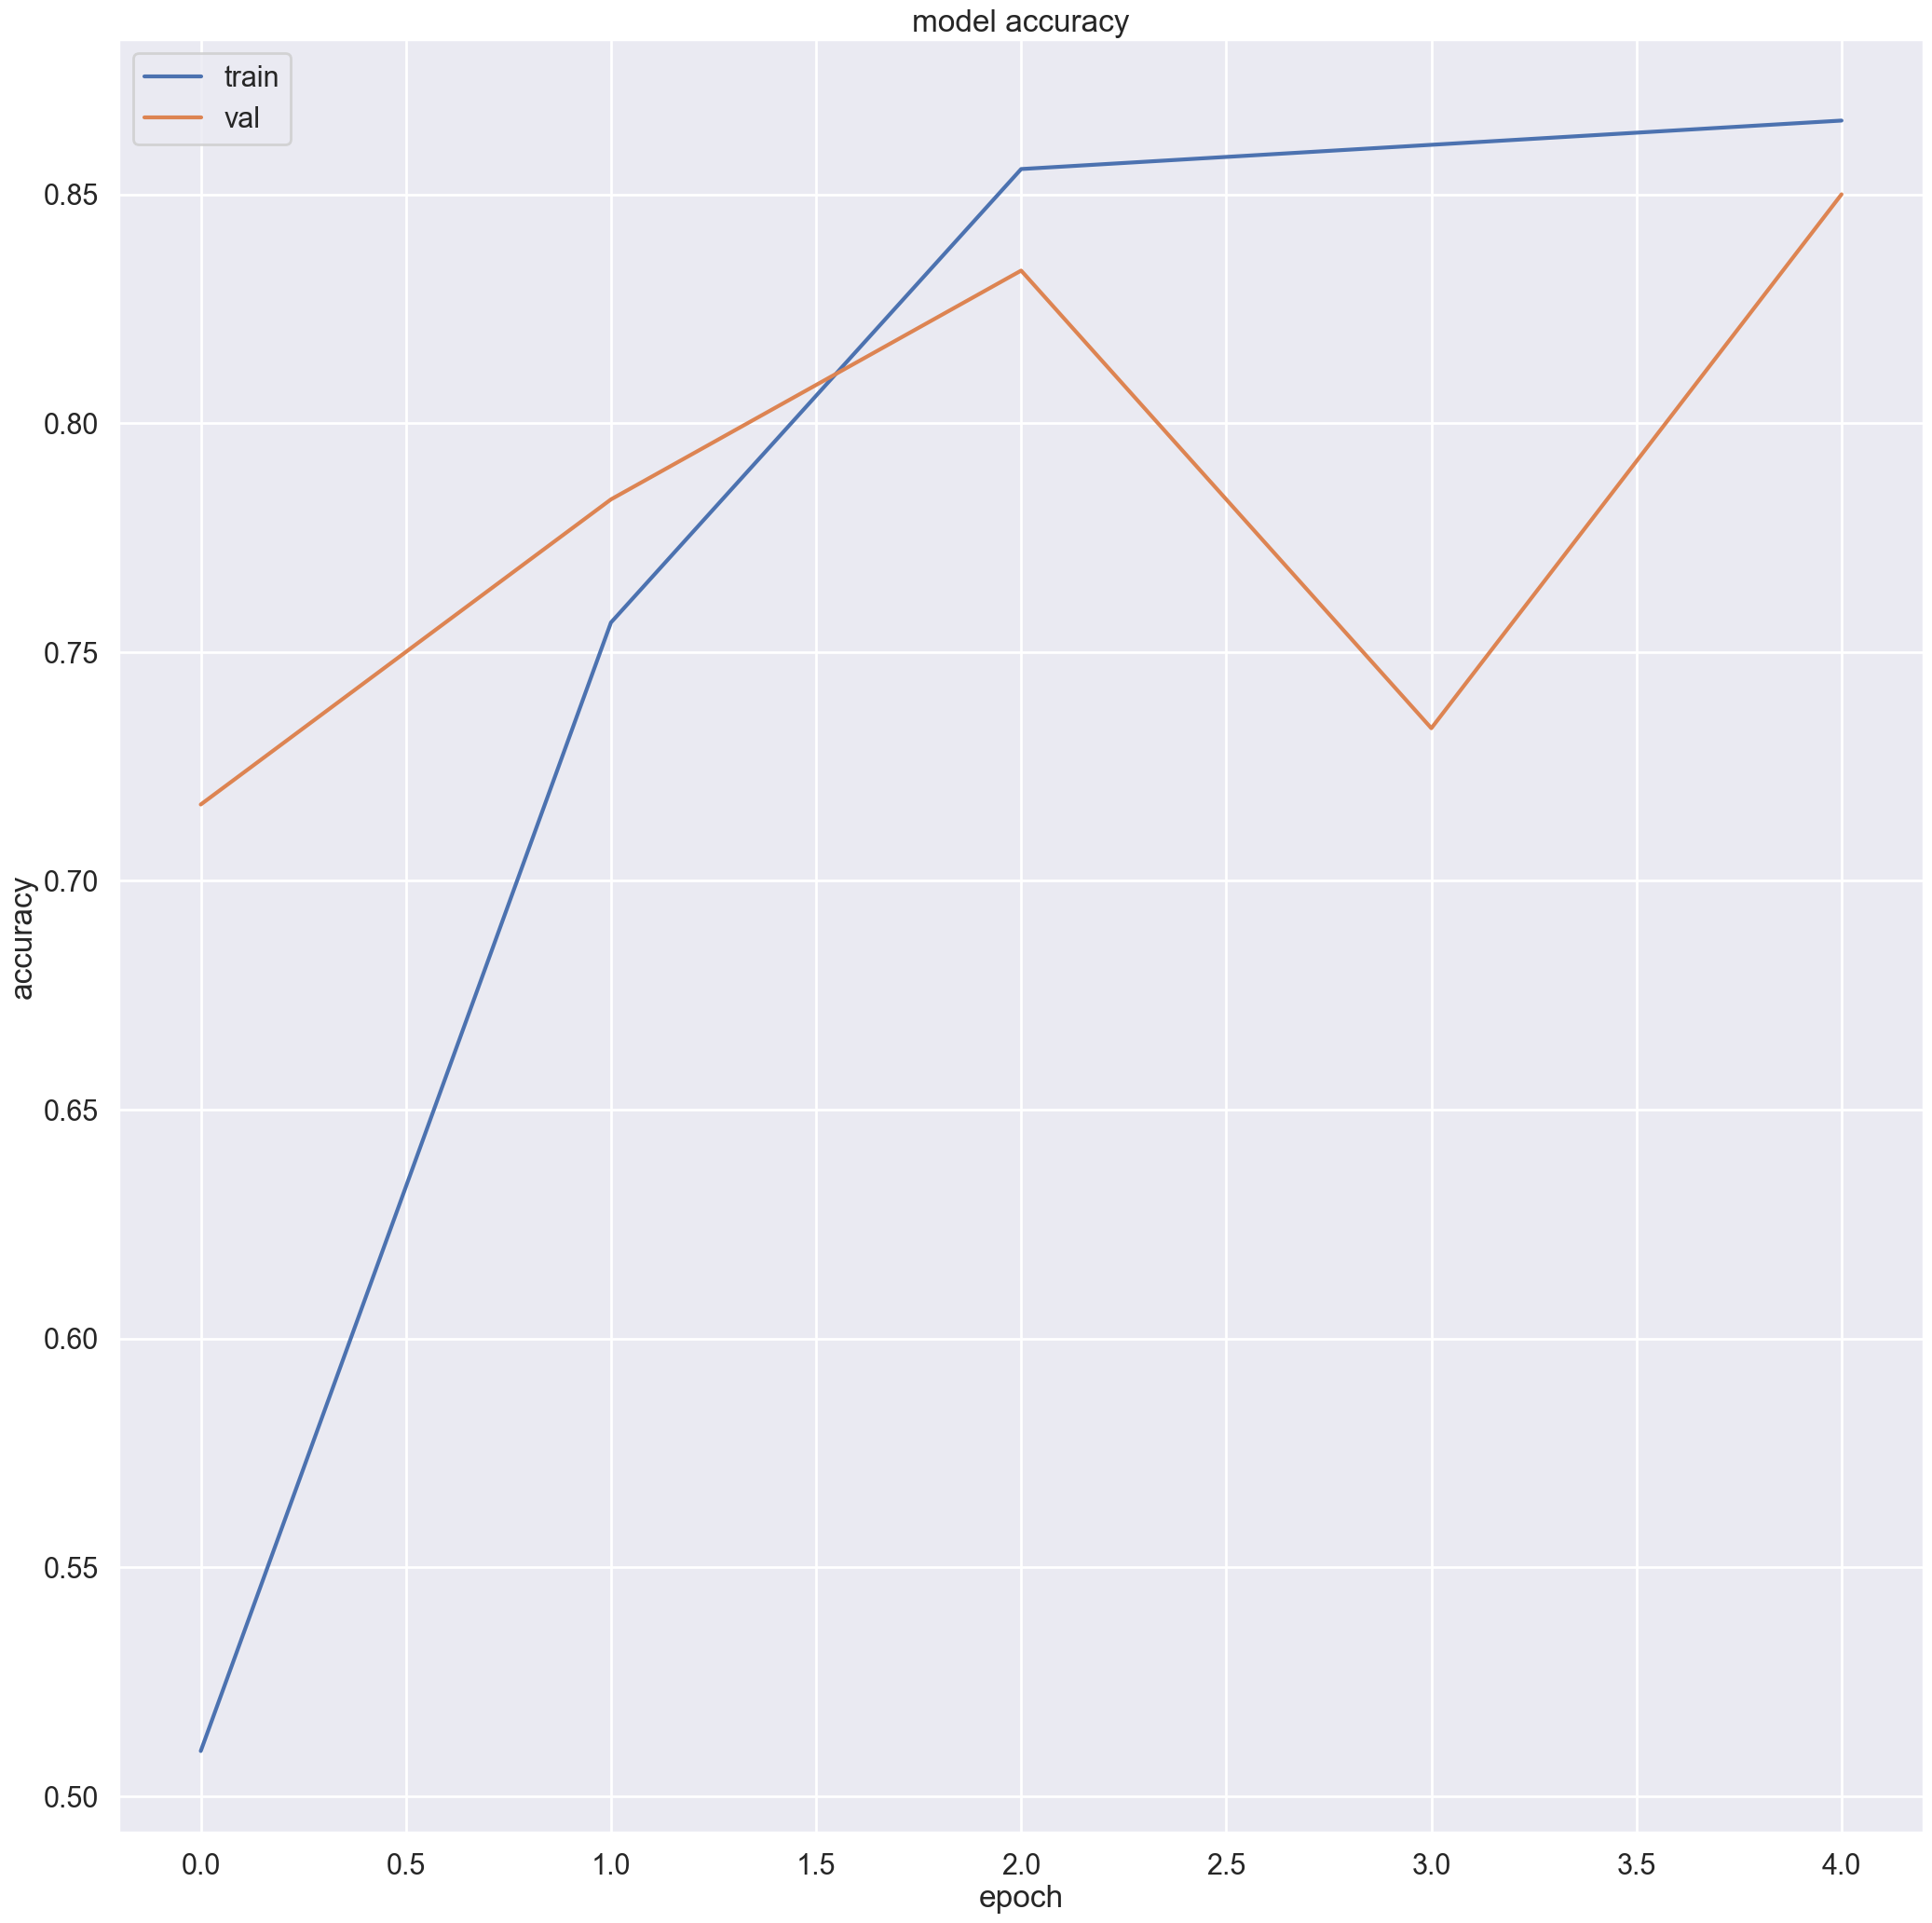

Final Model Accuracy - Training: 0.8661, Validation: 0.8500


In [9]:
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

import seaborn as sns
sns.set_theme()
sns.set_context("poster")

figure(figsize=(25, 25), dpi=100)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

final_epoch = len(history.history['accuracy'])
final_train_accuracy = history.history['accuracy'][-1]
final_val_accuracy = history.history['val_accuracy'][-1]
print(f"Final Model Accuracy - Training: {final_train_accuracy:.4f}, Validation: {final_val_accuracy:.4f}")


In [11]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

def preprocess_image(image_path, target_size=(225, 225)):
    img = load_img(image_path, target_size=target_size)
    x = img_to_array(img)
    x = x.astype('float32') / 255.
    x = np.expand_dims(x, axis=0)
    return x

x = preprocess_image(r'C:\Users\Ownerqp\OneDrive\Sohan\OneDrive - MESCOE\Desktop\BE\8sem\DL\Assignment03\Train\Train\Rust\8d0c3cc4636fc47d.jpg')
x

array([[[[0.3019608 , 0.4117647 , 0.2509804 ],
         [0.28235295, 0.3882353 , 0.22745098],
         [0.27058825, 0.38431373, 0.21176471],
         ...,
         [0.49019608, 0.62352943, 0.32156864],
         [0.5294118 , 0.654902  , 0.36078432],
         [0.5294118 , 0.65882355, 0.38039216]],

        [[0.28627452, 0.39607844, 0.23921569],
         [0.27450982, 0.39607844, 0.23137255],
         [0.25490198, 0.3764706 , 0.20392157],
         ...,
         [0.50980395, 0.63529414, 0.34901962],
         [0.5372549 , 0.65882355, 0.38431373],
         [0.5411765 , 0.6627451 , 0.4       ]],

        [[0.27450982, 0.38431373, 0.22745098],
         [0.26666668, 0.3882353 , 0.22352941],
         [0.26666668, 0.3882353 , 0.21568628],
         ...,
         [0.5137255 , 0.6392157 , 0.3529412 ],
         [0.5254902 , 0.64705884, 0.37254903],
         [0.5176471 , 0.6392157 , 0.3764706 ]],

        ...,

        [[0.5764706 , 0.63529414, 0.46666667],
         [0.5764706 , 0.63529414, 0.46666667]

In [12]:
import time
start_time=time.time()
predictions = model.predict(x)
predictions[0]
train_time = time.time()-start_time
print(f"Prediction time-{train_time}seconds")

1/1 [==============================] - 0s 396ms/step
Prediction time-0.594071626663208seconds


In [13]:
labels = train_generator.class_indices
labels = {v: k for k, v in labels.items()}
labels

{0: 'Healthy', 1: 'Powdery', 2: 'Rust'}

In [14]:
predicted_label = labels[np.argmax(predictions)]
print(predicted_label)

Rust


In [ ]:
import tkinter as tk
from tkinter import filedialog, messagebox
from PIL import ImageTk, Image
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

# Assuming 'model' and 'train_generator' are defined elsewhere in your code

def preprocess_image(image_path, target_size=(225, 225)):
    try:
        img = load_img(image_path, target_size=target_size)
        x = img_to_array(img)
        x = x.astype('float32') / 255.
        x = np.expand_dims(x, axis=0)
        return x
    except Exception as e:
        messagebox.showerror("Error", f"Error loading or preprocessing image: {str(e)}")
        return None

def predict_disease(image_path):
    try:
        x = preprocess_image(image_path)
        if x is not None:
            predictions = model.predict(x)
            labels = train_generator.class_indices
            labels = {v: k for k, v in labels.items()}
            predicted_label = labels[np.argmax(predictions)]
            return predicted_label
        else:
            return "Unknown"
    except Exception as e:
        messagebox.showerror("Error", f"An error occurred during prediction: {str(e)}")
        return "Unknown"

def select_image():
    file_path = filedialog.askopenfilename()
    if file_path:
        try:
            img = Image.open(file_path)
            img = img.resize((300, 300), Image.ANTIALIAS)
            img = ImageTk.PhotoImage(img)
            image_label.config(image=img)
            image_label.image = img
            predicted_label = predict_disease(file_path)
            result_label.config(text=f"Predicted Label: {predicted_label}")
        except Exception as e:
            messagebox.showerror("Error", f"An error occurred: {str(e)}")

# Creating the main application window
root = tk.Tk()
root.title("Plant Disease Prediction")

# Creating the GUI components
select_button = tk.Button(root, text="Select Image", command=select_image)
select_button.pack(pady=10)

image_label = tk.Label(root)
image_label.pack(pady=10)

result_label = tk.Label(root, text="")
result_label.pack(pady=10)

# Running the main event loop
root.mainloop()
